# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#response = requests.get(query_url + "New York").json()
#pprint(response)
#response["main"]["temp_max"]
data = []
counter = 0
for city in cities[:600]:
    response = requests.get(query_url + city).json()
    counter = counter + 1
    try:
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        wind_speed = response["wind"]["speed"]
        clouds = response["clouds"]["all"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        date = response["dt"]
        country = response["sys"]["country"]
        data.append([city, country, date, latitude, longitude, max_temp, humidity, wind_speed, clouds])
        print(f"counter {counter} {city}")
        time.sleep(.2)
    except:
        print("City Not Found")



counter 1 chaah
counter 2 ushuaia
counter 3 arraial do cabo
counter 4 smithers
counter 5 yilan
counter 6 ahipara
counter 7 cabinda
counter 8 dikson
counter 9 airai
counter 10 biak
City Not Found
counter 12 bengkulu
counter 13 vaini
counter 14 nhulunbuy
counter 15 kapaa
counter 16 youghal
counter 17 grand gaube
counter 18 doka
counter 19 hithadhoo
counter 20 puerto ayora
counter 21 panguna
counter 22 harnosand
counter 23 tessalit
City Not Found
counter 25 saldanha
counter 26 kibre mengist
counter 27 yellowknife
counter 28 rikitea
counter 29 phirangipuram
counter 30 port alfred
counter 31 listvyagi
counter 32 cavalcante
counter 33 bethel
City Not Found
counter 35 kandrian
City Not Found
counter 37 cape town
counter 38 ilulissat
counter 39 carnarvon
counter 40 pandan
counter 41 eyl
counter 42 saint-philippe
counter 43 los llanos de aridane
counter 44 salinas
counter 45 mikhaylovskoye
counter 46 yar-sale
City Not Found
counter 48 punta arenas
counter 49 castro
counter 50 tuktoyaktuk
counte

counter 404 dharchula
counter 405 jamalpur
counter 406 magaria
counter 407 pisco
counter 408 alta floresta
counter 409 samarai
City Not Found
counter 411 cabatuan
counter 412 mason city
counter 413 jieshi
counter 414 shaunavon
counter 415 upata
counter 416 kidal
City Not Found
counter 418 ziarat
counter 419 amol
counter 420 meulaboh
counter 421 kavieng
counter 422 khakhea
counter 423 moree
counter 424 assiniboia
counter 425 baykit
counter 426 bolkhov
counter 427 north bend
counter 428 praia da vitoria
counter 429 pacific grove
counter 430 tiznit
counter 431 mbandaka
City Not Found
counter 433 pedernales
City Not Found
City Not Found
counter 436 beira
counter 437 katsuura
counter 438 sorland
counter 439 barstow
counter 440 mnogovershinnyy
counter 441 yulara
counter 442 barranca
counter 443 kabalo
counter 444 bo phloi
counter 445 gambo
counter 446 bagdarin
counter 447 mogadishu
counter 448 gobabis
counter 449 nisia floresta
counter 450 ixtapa
counter 451 dillingen
counter 452 qasigianngu

In [12]:
citydf = pd.DataFrame(data, columns=["city", "country", "date", "Lat", "Lng", "max_temp", "humidity", "wind_speed", "clouds"])

citydf

city country        date    Lat     Lng  max_temp  humidity  \
0              chaah      MY  1603936972   2.25  103.05     86.27        64   
1            ushuaia      AR  1603936509 -54.80  -68.30     41.00        93   
2    arraial do cabo      BR  1603936514 -22.97  -42.03     74.98        94   
3           smithers      CA  1603936973  54.78 -127.17     33.80       100   
4              yilan      TW  1603936973  24.76  121.75     79.00        99   
..               ...     ...         ...    ...     ...       ...       ...   
549      sam roi yot      TH  1603937167  12.27   99.87     81.30        79   
550       filadelfia      US  1603936949  39.95  -75.16     59.00        77   
551        geraldton      AU  1603937168 -28.77  114.60     84.20        26   
552      kondinskoye      RU  1603937168  59.65   67.41     32.47        97   
553  paray-le-monial      FR  1603937169  46.45    4.12     53.01        93   

     wind_speed  clouds  
0          4.05      86  
1         20.80      90  
2          8.68       3  
3          4.70      90  
4          5.35     100  
..          ...     ...  
549        3.11     100  
550        3.36      90  
551       13.87       0  
552       12.48     100  
553        5.82      75  

[554 rows x 9 columns]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
citydf.to_csv(output_data_file, index_label="cityid")

In [14]:
citydf.head()

city country        date    Lat     Lng  max_temp  humidity  \
0            chaah      MY  1603936972   2.25  103.05     86.27        64   
1          ushuaia      AR  1603936509 -54.80  -68.30     41.00        93   
2  arraial do cabo      BR  1603936514 -22.97  -42.03     74.98        94   
3         smithers      CA  1603936973  54.78 -127.17     33.80       100   
4            yilan      TW  1603936973  24.76  121.75     79.00        99   

   wind_speed  clouds  
0        4.05      86  
1       20.80      90  
2        8.68       3  
3        4.70      90  
4        5.35     100

In [16]:
citydf.count()

city          554
country       554
date          554
Lat           554
Lng           554
max_temp      554
humidity      554
wind_speed    554
clouds        554
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
# There were no cities where the humidity was > 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

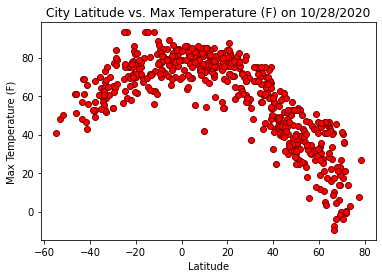

In [33]:
today = time.strftime("%m/%d/%Y")
plt.scatter(citydf["Lat"], citydf["max_temp"], facecolors="red", edgecolors="maroon")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature (F) on {today}", fontsize=12.25)
plt.savefig("Figures/LatitudeVsMaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

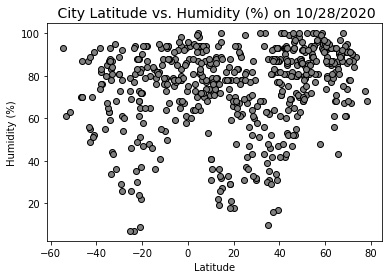

In [19]:
today = time.strftime("%m/%d/%Y")
plt.scatter(citydf["Lat"], citydf["humidity"], facecolors="gray", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f" City Latitude vs. Humidity (%) on {today}", fontsize=14)
plt.savefig("Figures/LatitudeVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

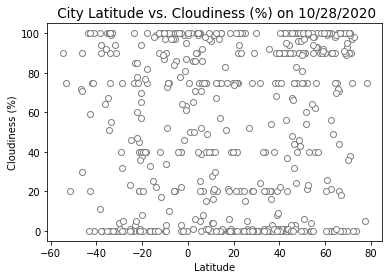

In [20]:
today = time.strftime("%m/%d/%Y")
plt.scatter(citydf["Lat"], citydf["clouds"], facecolors="white", edgecolors="gray")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f" City Latitude vs. Cloudiness (%) on {today}", fontsize=13.5)
plt.savefig("Figures/LatitudeVsClouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

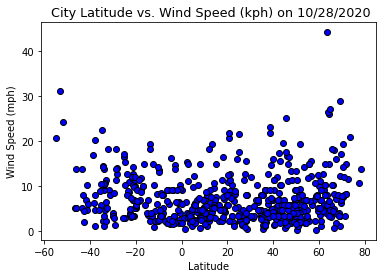

In [21]:
today = time.strftime("%m/%d/%Y")
plt.scatter(citydf["Lat"], citydf["wind_speed"], facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f" City Latitude vs. Wind Speed (mph) on {today}", fontsize=12.75)
plt.savefig("Figures/LatitudeVsWinds.png")
plt.show()

## Linear Regression

In [22]:
northern_hem = citydf[citydf["Lat"]>=0]
northern_hem.count()

city          384
country       384
date          384
Lat           384
Lng           384
max_temp      384
humidity      384
wind_speed    384
clouds        384
dtype: int64

In [23]:
southern_hem = citydf[citydf["Lat"]<0]
southern_hem.count()

city          170
country       170
date          170
Lat           170
Lng           170
max_temp      170
humidity      170
wind_speed    170
clouds        170
dtype: int64

In [24]:
# Built a function that calculates the linear regression for each graph by allowing the unique x and y variables to be added
# their descriptions, specify the hemisphere location, save the graph as a unique file, and allow the linear regression to 
# be added to the graph by plotting it on x and y coordinates. This method allows me to have less fun with the variety of
# colors used in the graph, but is more efficient. Also added a function that states the r-squared value.

def lin_reg_plot(x_values, y_values, x_des, y_des, hemisphere, filename, x_cord,y_cord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values, facecolor='teal', edgecolors='black')
    plt.plot(x_values, regression_values,"r-")
    plt.title(f"{hemisphere}:\nCity {x_des} vs. {y_des} on {today}")
    plt.annotate(equation,(x_cord, y_cord), fontsize=15, color="red")
    plt.xlabel(x_des)
    plt.ylabel(y_des)
    print(f"The r-squared is: {rvalue}.")
    print(equation)
    plt.savefig(f'Figures/{filename}')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8718742838127989.
y = -0.96x + 89.33


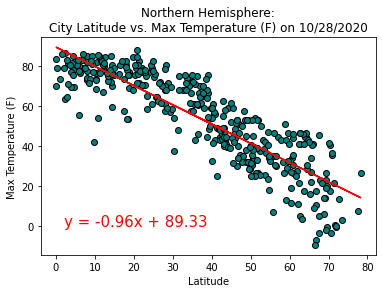

In [34]:
lin_reg_plot(northern_hem["Lat"], northern_hem["max_temp"],\
                  'Latitude','Max Temperature (F)','Northern Hemisphere',\
                 'NorthernHemLatVsMaxTemp.png', 2, 0)

In [59]:
print("There is a strong negative correlation between city latitude and maximum temperature. As one moves further north") 
print("from the equator, due to the tilt of the Earth’s axis, maximum temperatures decrease due to the angle at which the")
print("Sun warms the Earth. The r-squared values shows us that 87% of the data explains all the variability of the")
print("response data around its mean.")

There is a strong negative correlation between city latitude and maximum temperature. As one moves further north
from the equator, due to the tilt of the Earth’s axis, maximum temperatures decrease due to the angle at which the
Sun warms the Earth. The r-squared values shows us that 87% of the data explains all the variability of the
response data around its mean.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6871729096847183.
y = 0.57x + 82.51


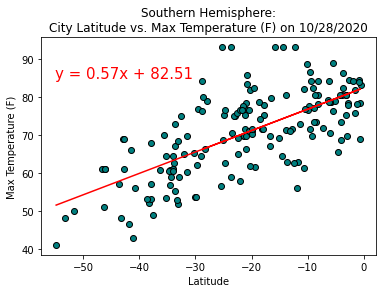

In [53]:
lin_reg_plot(southern_hem["Lat"], southern_hem["max_temp"],\
                  'Latitude','Max Temperature (F)','Southern Hemisphere',\
                 'SouthernHemLatVsMaxTemp.png', -55, 85)

In [56]:
print("There is a strong positive correlation between city latitude and maximum temperature. As one moves closer to the") 
print("equator from the south, due to the tilt of the Earth’s axis, maximum temperatures increase due to the angle")
print("the Sun warms the Earth. The r-squared values shows us that 68% of the data explains all the variability of the") 
print("response data around its mean.")

There is a strong positive correlation between city latitude and maximum temperature. As one moves closer to the
equator from the south, due to the tilt of the Earth’s axis, maximum temperatures increase due to the angle at which
the Sun warms the Earth. The r-squared values shows us that 87% of the data explains all the variability of the
response data around its mean.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24003389068870534.
y = 0.23x + 66.86


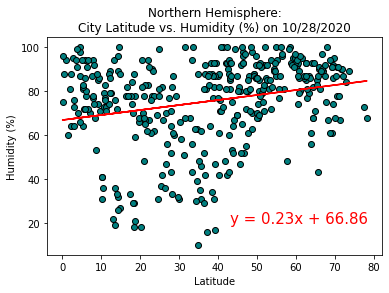

In [27]:
lin_reg_plot(northern_hem["Lat"], northern_hem["humidity"],\
                  'Latitude','Humidity (%)','Northern Hemisphere',\
                 'NorthernHemLatVsHumidity.png', 43, 20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16372855558913496.
y = 0.24x + 76.86


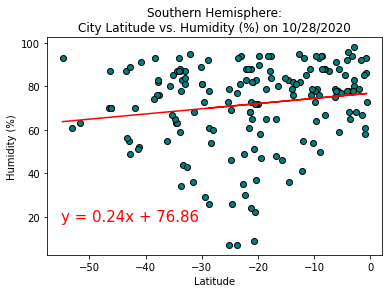

In [28]:
lin_reg_plot(southern_hem["Lat"], southern_hem["humidity"],\
                  'Latitude','Humidity (%)','Southern Hemisphere',\
                 'SouthernHemLatVsHumidity.png', -55, 18)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2059845099140487.
y = 0.41x + 35.39


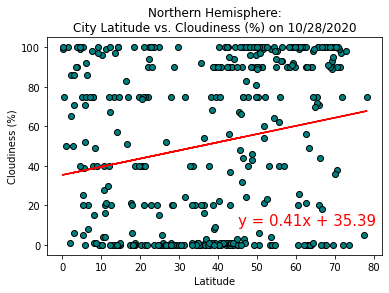

In [45]:
lin_reg_plot(northern_hem["Lat"], northern_hem["clouds"],\
                  'Latitude','Cloudiness (%)','Northern Hemisphere',\
                 'NorthernHemLatVsClouds.png', 45, 10)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06460980457474107.
y = 0.19x + 54.24


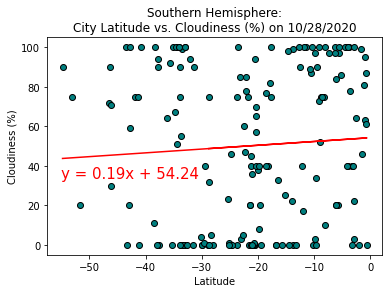

In [40]:
lin_reg_plot(southern_hem["Lat"], southern_hem["clouds"],\
                  'Latitude','Cloudiness (%)','Southern Hemisphere',\
                 'SouthernHemLatVsClouds.png', -55, 34)

In [58]:
print("There is almost no correlation between city latitude and cloudiness. As one moves closer to the equator from") 
print("the south, this has little impact on the percentage of cloud cover.")
print("The r-squared values shows us that 6% of the data explains all the variability of the response data around") 
print("its mean. Thus implying that the model does not explain any of the variance and therefore there is no correlation.")

There is almost no correlation between city latitude and cloudiness. As one moves closer to the equator from
the south, this has little impact on the percentage of cloud cover.
The r-squared values shows us that 6% of the data explains all the variability of the response data around
its mean. Thus implying that the model does not explain any of the variance and therefore there is no correlation.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20651665468398664.
y = 0.06x + 4.99


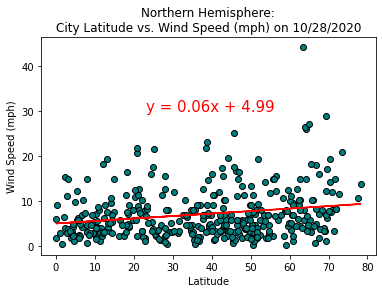

In [41]:
lin_reg_plot(northern_hem["Lat"], northern_hem["wind_speed"],\
                  'Latitude','Wind Speed (mph)','Northern Hemisphere',\
                 'NorthernHemLatVsWinds.png', 23, 30)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.29089517725836184.
y = -0.11x + 5.49


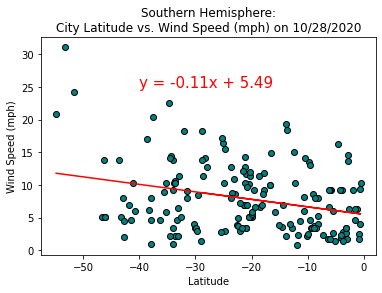

In [46]:
lin_reg_plot(southern_hem["Lat"], southern_hem["wind_speed"],\
                  'Latitude','Wind Speed (mph)','Southern Hemisphere',\
                 'SouthernHemLatVsWinds.png', -40, 25)